# Summary

This notebook explores open source offline alternatives to Google Gemini API.

In [ ]:
from palm_9000.utils import play_audio
import matplotlib.pyplot as plt
import scipy.io.wavfile
import subprocess
import langdetect
import tempfile

/home/hankehly/Projects/PALM-9000/.venv/lib/python3.12/site-packages/webrtcvad.py:1: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources


In [ ]:
def text_to_speech(text: str, lang: str):
    with (
        tempfile.NamedTemporaryFile("w+", encoding="utf-8", suffix=".txt") as txt_file,
        tempfile.NamedTemporaryFile(suffix=".wav") as wav_file,
    ):
        txt_file.write(text)
        txt_file.flush()

        if lang == "ja":
            subprocess.run(
                [
                    "open_jtalk",
                    "-x",
                    "/var/lib/mecab/dic/open-jtalk/naist-jdic",
                    "-m",
                    "/usr/share/hts-voice/nitech-jp-atr503-m001/nitech_jp_atr503_m001.htsvoice",
                    "-ow",
                    wav_file.name,
                    txt_file.name,
                ],
                check=True,
            )
            volume = 5.0
        elif lang == "en":
            subprocess.run(["espeak", "-w", wav_file.name, text], check=True)
            volume = 2.0
        else:
            raise NotImplementedError(f"Language '{lang}' not supported.")

        sample_rate, audio_data = scipy.io.wavfile.read(wav_file.name)
        print(audio_data)
        play_audio(audio_data, sample_rate, volume=volume)
        return audio_data


text = "Hello, I am raspberry pi. I am a robot that can talk to you."
# text = "こんにちは、私はラズベリーパイです。あなたと話すことができるロボットです。"
lang = langdetect.detect(text)
data = text_to_speech(text, lang=lang)

[ 0  0  0 ... 10 10  9]


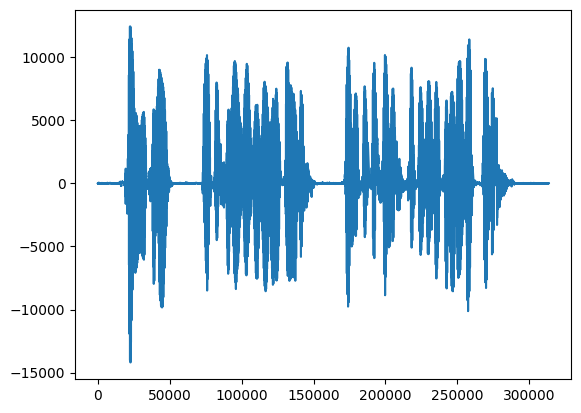

In [ ]:
plt.plot(data)